In [142]:
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
import torchvision
import matplotlib.pyplot as plt
import pickle

In [69]:
# we actually just need it to download cifar dataset
torchvision.datasets.CIFAR10(train=True, download=True, root='../data/')
torchvision.datasets.CIFAR10(train=False, download=True, root='../data/')


Files already downloaded and verified
Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../data/
    Split: Test

In [168]:
class CiFaData(Dataset):
  def __init__(self, stage="train"):
    self.base_folder = "cifar-10-batches-py"
    if stage == "train":
      batch_collection = [f"data_batch_{i}" for i in range(1, 5)]
    elif stage == "val":
      batch_collection = ["data_batch_5"]
    elif stage == "test":
      batch_collection = ["test_batch"]
    else:
      raise ValueError("Invalid stage, choose from train, val, test.")
    x_data = []
    y_data = []
    for batch in batch_collection:
      with open(f"../data/cifar-10-batches-py/{batch}", "rb") as f:
        data = pickle.load(f, encoding="latin1") 
        x_data.extend(data["data"])
        y_data.extend(data["labels"])
    x_data = np.vstack(x_data).reshape(-1, 3, 32, 32) # from list to np stack; unflatten
    x_data = x_data.transpose(0, 2, 3, 1) # into (N, H, W, C)
    self.x_data = torch.tensor(x_data)
    self.y_data = torch.tensor(y_data)
  
  def __len__(self):
    # each 'batch' comes with 10k examples
    return self.y_data.shape[0]

  def __getitem__(self, idx):
    return(self.x_data[idx], self.y_data[idx])

In [169]:
train_ds = CiFaData(stage="train")
val_ds = CiFaData(stage="val")
test_ds = CiFaData(stage="test")

In [170]:
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

In [174]:
# sanity check: length of loader
count_total = 0
for x, y in train_loader:
  count_total += x.shape[0]
  # count += 1
print(count_total)

40000


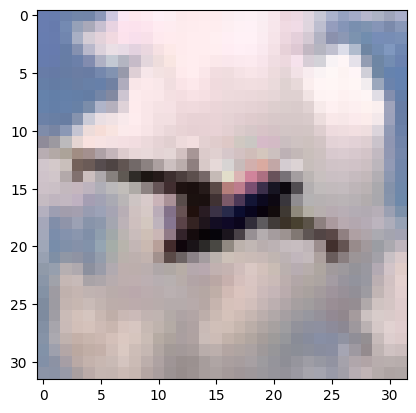

In [175]:
# check the object and look at some images
plt.imshow(x[0])